In [66]:

import pandas as pd
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt



In [67]:
df = pd.read_csv("../Data/heroes_completo_limpio.csv")
df = df.drop(["Inteligencia", "Fuerza", "Peso", "Durabilidad", "Potencia", "Combate", "Altura", "Color_Ojos", "Nombre Completo", "Alias", "Lugar de nacimiento", "Primera aparición", "Editor", "Alineación", "Color_Pelo"], axis=1)
df.head(5)

,ID,Nombre,Velocidad,Genero,Etnia
0,1,A-Bomb,17,Male,Human
1,2,Abe Sapien,35,Male,Icthyo Sapien
2,3,Abin Sur,53,Male,Ungaran
3,4,Abomination,53,Male,Human / Radiation
4,5,Abraxas,83,Male,Cosmic Entity


<h4>Pregunta 3 : ¿Filtrar por genero, indicar la proporcion de hombres y mujeres , indicar la etnia mas dominante de cada genero? 
¿ El genero masculino es mas rapido que el femenino? <h4>

Cambiamos los datos de "male", "female" y "-" por nombres mas reconocidos

In [68]:
df["Genero"] = df["Genero"].replace({"Male": "Masculino", "Female": "Femenino", "-": "Indeterminado"})
df

,ID,Nombre,Velocidad,Genero,Etnia
0,1,A-Bomb,17,Masculino,Human
1,2,Abe Sapien,35,Masculino,Icthyo Sapien
2,3,Abin Sur,53,Masculino,Ungaran
3,4,Abomination,53,Masculino,Human / Radiation
4,5,Abraxas,83,Masculino,Cosmic Entity
...,...,...,...,...,...
726,727,Yellowjacket II,35,Femenino,Human
727,728,Ymir,27,Masculino,Frost Giant
728,729,Yoda,33,Masculino,Yoda's species
729,730,Zatanna,23,Femenino,Human


Funcion para filtrar por género y sacamos los datos de cada uno de ellos

In [69]:
def filtrar_por_genero(df, genero):

    genero = genero.lower()
    return df[df["Genero"].str.lower() == genero]


In [70]:
df_hombres = filtrar_por_genero(df, "Masculino")
df_hombres.value_counts("Genero")

Genero
Masculino    502
Name: count, dtype: int64

In [71]:
df_mujeres = filtrar_por_genero(df, "Femenino")
df_mujeres.value_counts("Genero")


Genero
Femenino    200
Name: count, dtype: int64

In [72]:
df_indeterminado = filtrar_por_genero(df, "Indeterminado")
df_indeterminado.value_counts("Genero")

Genero
Indeterminado    29
Name: count, dtype: int64

Sacamos la proporcion de cada uno de los géneros comparandolo con el total de individuos

In [73]:
proporciones = df["Genero"].value_counts(normalize=True)
proporciones

Genero
Masculino        0.686731
Femenino         0.273598
Indeterminado    0.039672
Name: proportion, dtype: float64

Lo graficamos en una gráfica de tarta para poder verlo con más claridad. Observamos que la gran mayoria de superhéroes son de genero masculino.

<Axes: title={'center': 'Distribución por género'}, ylabel='count'>

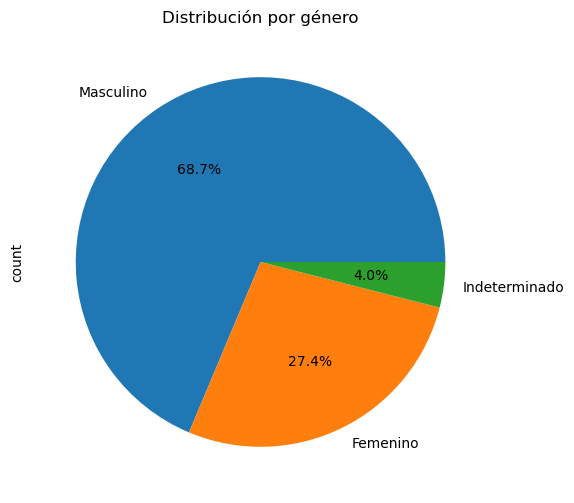

In [74]:
conteo = df["Genero"].value_counts()

conteo.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    title="Distribución por género"
)


Ahora vamos a crear una función para ver cuales son las Etnias mas comunes por cada genero. La Etnia mas predominante en generos como masculino y femenino son los humanos, observamos que el genero que no esta determinado se debe a seres cósmicos.

In [75]:

for genero in ["Masculino", "Femenino", "Indeterminado"]:
    etnia = df[df["Genero"] == genero]["Etnia"]
    
    if not etnia.empty:
        etnia_dominante = etnia.mode()[0]
        print(f"Etnia más dominante de {genero}: {etnia_dominante}")
    else:
        print(f"No hay datos de etnia para {genero}")


Etnia más dominante de Masculino: Human
Etnia más dominante de Femenino: Human
Etnia más dominante de Indeterminado: Cosmic Entity


Vamos a graficar en un gráfico de barras para ver las 10 Etnias con más individuos como se distribuyen los géneros en cada una de ellas.

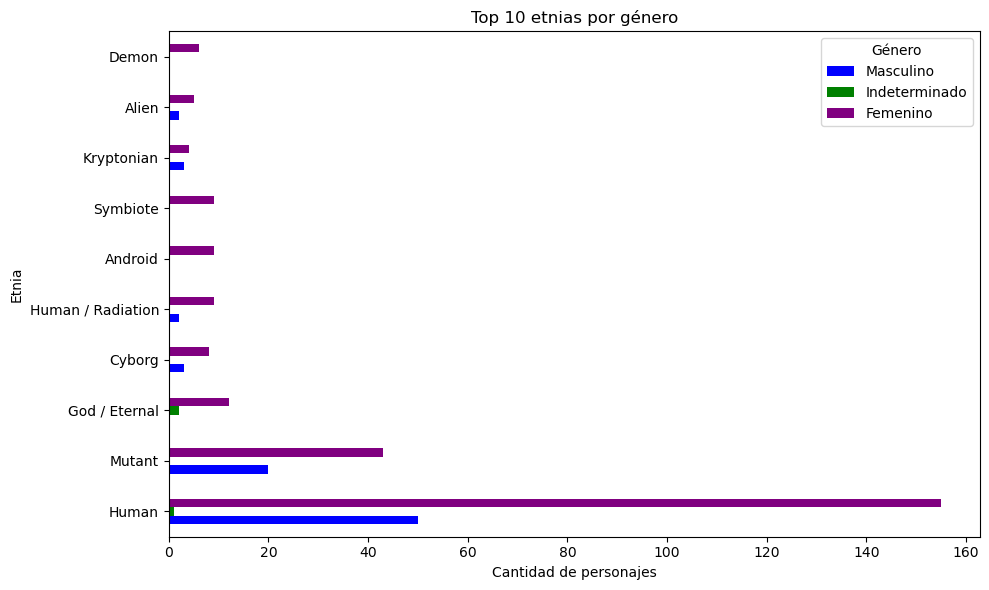

In [76]:
# Contar etnias por género
tabla = pd.crosstab(df["Etnia"], df["Genero"])

# Tomar solo las 10 etnias con más personajes en total
tabla["Total"] = tabla.sum(axis=1)
tabla_top = tabla.sort_values("Total", ascending=False).head(10)
tabla_top = tabla_top.drop("Total", axis=1)

# Graficar
tabla_top.plot(kind="barh", figsize=(10, 6),
     color=["blue", "green", "purple"])
plt.xlabel("Cantidad de personajes")
plt.ylabel("Etnia")
plt.title("Top 10 etnias por género")
plt.legend(["Masculino", "Indeterminado", "Femenino"], title="Género")

plt.tight_layout()
plt.show()


Vamos a sacar los promedios de velocidad de cada uno de los generos para ver como se comportan. Como vemos los de género Indeterminado son los más rapidos seguidos por el género masculino.

In [77]:
# Convertimos velocidad a numérico, los valores que no se puedan convertir se vuelven NaN
df["Velocidad"] = pd.to_numeric(df["Velocidad"], errors="coerce")


# Filtramos solo Hombre, Imdeterminado y Mujer y eliminamos valores nulos en velocidad
df_vel = df[df["Genero"].isin(["Masculino", "Femenino", "Indeterminado"]) & df["Velocidad"].notna()]

# Calculamos la media de velocidad por género
vel_media = df_vel.groupby("Genero")["Velocidad"].mean()
print("Velocidad media por género:")
print(vel_media)


Velocidad media por género:
Genero
Femenino         37.032680
Indeterminado    49.466667
Masculino        41.138191
Name: Velocidad, dtype: float64


Graficamos para ver con más claridad la diferencia entre sexos y su velocidad, lo que resulta es que el indeterminado que está mayoritariamente compuesto por Entidades Cósmicas es el más rapido de todos seguido por los hombres.

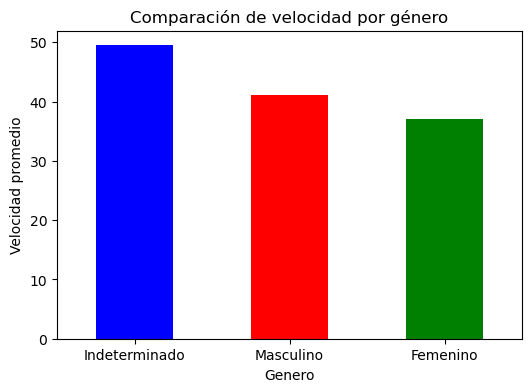

In [78]:

vel_media_ordenada = vel_media.sort_values(ascending=False)
vel_media_ordenada.plot(
    kind="bar", 
    color=["blue", "red", "green"], 
    figsize=(6,4)
)
plt.ylabel("Velocidad promedio")

plt.title("Comparación de velocidad por género")
plt.xticks(rotation=0)
plt.show()
